<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_09_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorDataset

In [34]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

In [2]:
# Create a dataset in Numpy
nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations, nFeatures)

data.shape

(100, 20)

In [3]:
# Convert the data into pytorch tensor
dataT = torch.tensor(data)

# Print out some information
print("Numpy Data")
print(type(data))
print()
print(data.shape) # numpy -> .shape
print()
print(data.dtype) # The 

Numpy Data
<class 'numpy.ndarray'>

(100, 20)

float64


In [4]:
print("Tensor Data")
print(type(dataT))
print()
print(dataT.size()) # torch -> size() dataT.shape also works
print()
print(dataT.dtype)

Tensor Data
<class 'torch.Tensor'>

torch.Size([100, 20])

torch.float64


In [5]:
# Converting datatypes
dataT2 = torch.tensor(data).float()
print(dataT2.dtype)

torch.float32


In [6]:
# .long() works for integers, like we have always used to create labels
dataT3 = torch.tensor(data).long()
print(dataT3.dtype)

torch.int64


In [7]:
# Numpy Data
data

array([[ 0.9967915 ,  0.34323311,  0.37051492, ..., -0.13123295,
        -1.8267084 ,  1.11413198],
       [ 0.25180362, -2.25931033,  0.17148823, ..., -1.14323571,
         2.02592951, -0.03974172],
       [ 0.42656699,  0.42679475, -2.27714039, ..., -0.59696545,
        -1.56227537, -1.03451708],
       ...,
       [ 1.03732373,  0.75888444, -0.65063706, ...,  0.05118021,
         0.16738484, -0.67012479],
       [-0.91117139, -0.63432906, -1.70847911, ..., -1.50201273,
         0.31456932, -3.11636302],
       [ 2.10332061, -0.00539816,  0.23472897, ..., -2.2432004 ,
         0.25503878, -0.1597969 ]])

In [8]:
# Tensor
dataT2

tensor([[ 0.9968,  0.3432,  0.3705,  ..., -0.1312, -1.8267,  1.1141],
        [ 0.2518, -2.2593,  0.1715,  ..., -1.1432,  2.0259, -0.0397],
        [ 0.4266,  0.4268, -2.2771,  ..., -0.5970, -1.5623, -1.0345],
        ...,
        [ 1.0373,  0.7589, -0.6506,  ...,  0.0512,  0.1674, -0.6701],
        [-0.9112, -0.6343, -1.7085,  ..., -1.5020,  0.3146, -3.1164],
        [ 2.1033, -0.0054,  0.2347,  ..., -2.2432,  0.2550, -0.1598]])

In [9]:
# Integer Tensor
dataT3

tensor([[ 0,  0,  0,  ...,  0, -1,  1],
        [ 0, -2,  0,  ..., -1,  2,  0],
        [ 0,  0, -2,  ...,  0, -1, -1],
        ...,
        [ 1,  0,  0,  ...,  0,  0,  0],
        [ 0,  0, -1,  ..., -1,  0, -3],
        [ 2,  0,  0,  ..., -2,  0,  0]])

In [11]:
# Convert the tensors into PyTorch Datasets
# dataset = TensorDataset(data) # This is not a tensor, so cannot be converted
# We need tensor for that
dataset = TensorDataset(dataT)
# Dataset is a two-element tuple comprising of data and labels
dataset.tensors

(tensor([[ 0.9968,  0.3432,  0.3705,  ..., -0.1312, -1.8267,  1.1141],
         [ 0.2518, -2.2593,  0.1715,  ..., -1.1432,  2.0259, -0.0397],
         [ 0.4266,  0.4268, -2.2771,  ..., -0.5970, -1.5623, -1.0345],
         ...,
         [ 1.0373,  0.7589, -0.6506,  ...,  0.0512,  0.1674, -0.6701],
         [-0.9112, -0.6343, -1.7085,  ..., -1.5020,  0.3146, -3.1164],
         [ 2.1033, -0.0054,  0.2347,  ..., -2.2432,  0.2550, -0.1598]],
        dtype=torch.float64),)

In [12]:
# We can access all the numbers by indexing on zero element of the tuple
dataset.tensors[0]

tensor([[ 0.9968,  0.3432,  0.3705,  ..., -0.1312, -1.8267,  1.1141],
        [ 0.2518, -2.2593,  0.1715,  ..., -1.1432,  2.0259, -0.0397],
        [ 0.4266,  0.4268, -2.2771,  ..., -0.5970, -1.5623, -1.0345],
        ...,
        [ 1.0373,  0.7589, -0.6506,  ...,  0.0512,  0.1674, -0.6701],
        [-0.9112, -0.6343, -1.7085,  ..., -1.5020,  0.3146, -3.1164],
        [ 2.1033, -0.0054,  0.2347,  ..., -2.2432,  0.2550, -0.1598]],
       dtype=torch.float64)

In [32]:
# Let's add labels to the data
labels = torch.ceil(torch.linspace(0.01,4, nObservations))
labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [33]:
# The above is just a list, it is not a tensor with orientation
# Lets transform it into an actual matrix (column vector)
labels = labels.reshape((len(labels),1))
print(labels.T)
# Two sets of fquare brackets :)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])


In [15]:
# Let's create a new dataset
dataset = TensorDataset(dataT, labels)
print(dataset.tensors[0].size())
print()
print(dataset.tensors[1].size())

torch.Size([100, 20])

torch.Size([100, 1])


In [20]:
# See only first data and its labels
dataset[0]

(tensor([ 0.9968,  0.3432,  0.3705, -0.2423,  0.1509, -1.0959, -1.8894, -0.8657,
          0.0670, -1.7220,  0.7425,  0.3204,  0.7241,  0.2190,  2.1436,  1.3726,
          1.1369, -0.1312, -1.8267,  1.1141], dtype=torch.float64),
 tensor([1.]))

In [21]:
len(dataset.tensors)

2

In [16]:
# Just for comparison with a non-matrix ordered set of numbers
print(np.shape(np.random.randint(5,size=nObservations)))

(100,)


# DataLoaders

In [22]:
# Create a DataLoader Object
batchsize = 25
dataloader = DataLoader(dataset, batch_size = batchsize) #shuffle=True,drop_last=True)
dataloader

In [23]:
dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

In [24]:
dataloader.dataset.tensors[1].size()

torch.Size([100, 1])

In [25]:
# Use the dataloader object in a for loop to break up the data inro minibatches
for dat, labs in dataloader:
    print("Batch Info")
    print(dat.size())
    print(labs.size())
    print()

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])

Batch Info
torch.Size([25, 20])
torch.Size([25, 1])



In [26]:
# We can also have a look at the labels
for dat, labels in dataloader:
    print(labels.T)
    print()

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.]])

tensor([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2.]])

tensor([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
         3., 3., 3., 3., 3., 3., 3.]])

tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
         4., 4., 4., 4., 4., 4., 4.]])



In [27]:
# Now lets try with shuffling and see what happens
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)

In [28]:
for dat,labs in dataloader:
    print(labs.T)
    print()

tensor([[2., 1., 3., 2., 2., 2., 3., 3., 1., 4., 2., 4., 4., 2., 4., 1., 4., 1.,
         3., 4., 4., 1., 1., 4., 3.]])

tensor([[1., 1., 2., 3., 1., 4., 2., 2., 2., 3., 3., 3., 3., 3., 2., 4., 2., 1.,
         3., 2., 3., 4., 3., 4., 4.]])

tensor([[1., 4., 3., 1., 2., 3., 1., 2., 2., 4., 4., 1., 1., 4., 1., 1., 1., 1.,
         2., 2., 4., 3., 3., 3., 4.]])

tensor([[2., 4., 4., 1., 1., 4., 3., 4., 4., 1., 2., 4., 2., 3., 3., 3., 3., 2.,
         1., 3., 1., 1., 2., 2., 2.]])



In [30]:
# To get only one batch for testing (as we have been doing for  along time)
dat,labs = next(iter(dataloader))
labs.T

tensor([[4., 1., 1., 2., 3., 4., 1., 1., 4., 2., 1., 3., 1., 2., 3., 2., 1., 4.,
         3., 2., 1., 1., 3., 2., 2.]])

# Data Size and Network Size

In this case we are going to train a model by parametrically varying the depth while keeping the number of units constant (80). 

We will also parametrically vary the amount of data from N=50 to N=550

In [35]:
# define a function to create the dataset
def createSomeData(nPerClust):
    A = [1,1]
    B = [5,1]
    C = [4,4]

    # Generate data
    a = [A[0] + np.random.randn(nPerClust), A[1] + np.random.randn(nPerClust)]
    b = [B[0] + np.random.randn(nPerClust), B[1] + np.random.randn(nPerClust)]
    c = [C[0] + np.random.randn(nPerClust), C[1] + np.random.randn(nPerClust)]

    # Define the true labels
    labels_np = np.hstack((np.zeros((nPerClust)),
                           np.ones((nPerClust)),
                           np.ones((nPerClust))+1))
    
    # Concatenate everything intp a matrix
    data_np = np.hstack((a,b,c)).T

    # Put all the outputs into a dictionary
    output = {}
    output["data"] = torch.tensor(data_np).float()
    output["labels"] = torch.tensor(labels_np).long()

    # Split the data into training and test set
    train_data, test_data, train_labels, test_labels = train_test_split(output["data"], output["labels"], test_size=0.1)

    # Convert them into PyTorch datasets (they have already been converted into tensors)
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # Translate them into DataLoader Objects
    batchsize=8
    output["train_data"] = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
    output["test_data"] = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return output

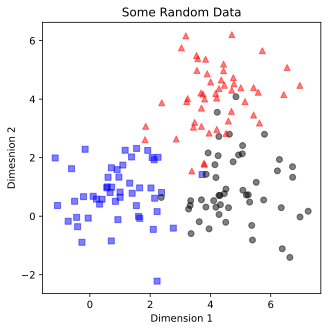

In [37]:
# Check whether the function works
theData = createSomeData(50)

data = theData["data"]
labels = theData["labels"]

# Plot everything
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], "bs", alpha=0.5)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], "ko", alpha=0.5)
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], "r^", alpha=0.5)
plt.title("Some Random Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimesnion 2")
plt.show()